<a href="https://colab.research.google.com/github/darshil8008/Open-Images-Object-Detection/blob/main/Open_Images_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting connected to google drive to use files

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Loading the required files

In [ ]:
downloaded = drive.CreateFile({'id':'1IcGzU91IMnErn6N4Kw6v0KlknKin7roJ'}) 
downloaded.GetContentFile('coco.names') 

In [ ]:
downloaded = drive.CreateFile({'id':'1Nutx3_2-w5wl7GWc_ay37dFUigaCoy5M'}) 
downloaded.GetContentFile('yolov3.weights')

In [ ]:
downloaded = drive.CreateFile({'id':'1eRpkNtcKWhSwwygP1Wyr4Hmhk1R6lpQT'}) 
downloaded.GetContentFile('city.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':'14WKJSVkptZocSenMeTkMfnovZEWr27X2'}) 
downloaded.GetContentFile('kite.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':'14BgkxqVCxevC0L-UCUalsZlThgTIxLbc'}) 
downloaded.GetContentFile('passport_photo.jpg')

# import the required libraries


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load weights and cfg files

In [ ]:
yolo = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")

error: ignored

# load the coco.names folder

In [ ]:
classes = []

with open("/content/coco.names", "r") as f:
  classes = f.read().splitlines()

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
len(classes)

80

# load the image from which objects are to be detected

In [ ]:
img = cv2.imread("/content/passport_photo.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0, 0, 0), swapRB = True, crop = False)

In [ ]:
blob.shape

(1, 3, 320, 320)

# Set the blob as an input image and also define the output layer

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layer_name = yolo.getUnconnectedOutLayersNames()

layeroutput = yolo.forward(output_layer_name)

# Find where the bounding boxes in the image are

In [ ]:
boxes = []
confidences = []
class_ids = []
width = 320
height = 320

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


# See how many numbers of bounding boxes are there

In [ ]:
len(boxes)

2

# Add this bounding boxes to the image.

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))


# Take each and every object over there and add bounding boxes to these

In [ ]:
if len(indexes) > 0:
  for i in indexes.flatten():
    x, y, w, h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 1)
    cv2.putText(img, label + confi, (x, y+20), font, 2, (255, 255, 255), 4)


# See the model. (Show the model)

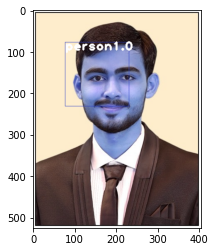

In [ ]:
plt.imshow(img)

# Save the image to see properly

In [ ]:
cv2.imwrite("./result.jpg", img)

True